In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv( "Churn_Modelling (1).csv" )
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
df.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


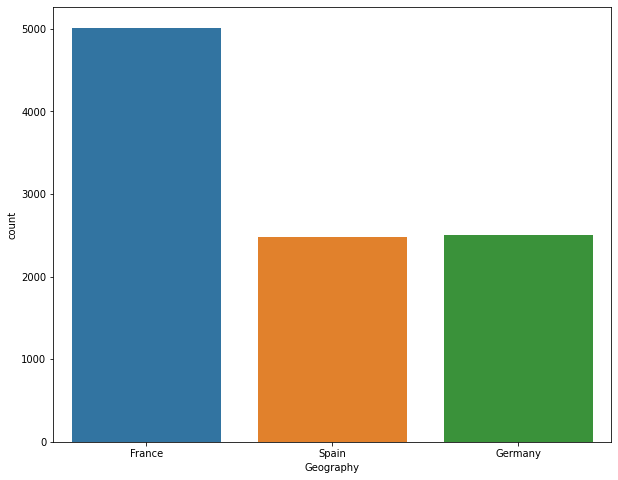

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Geography')
plt.show()

In [ ]:
(df['Geography'].value_counts()/len(df))*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

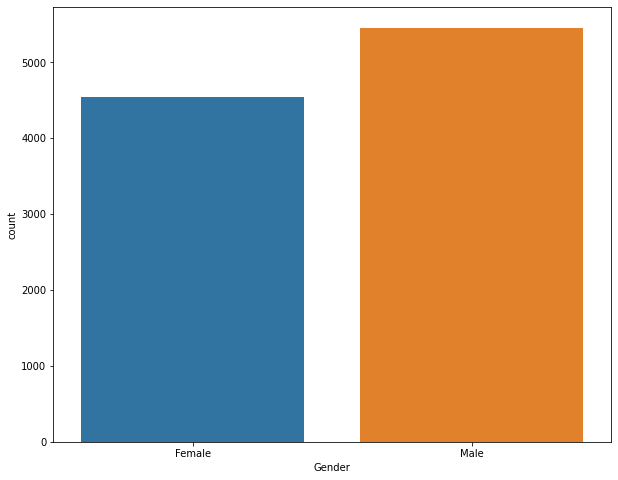

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Gender')
plt.show()

In [ ]:
(df['Gender'].value_counts()/len(df))*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

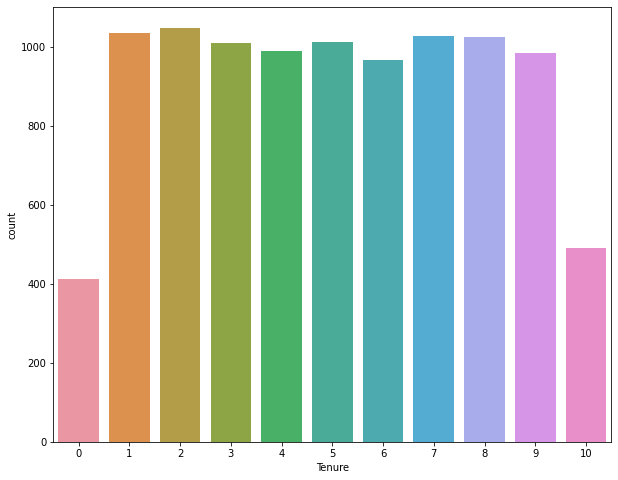

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Tenure')
plt.show()

In [ ]:
(df['Tenure'].value_counts()/len(df))*100

2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: Tenure, dtype: float64

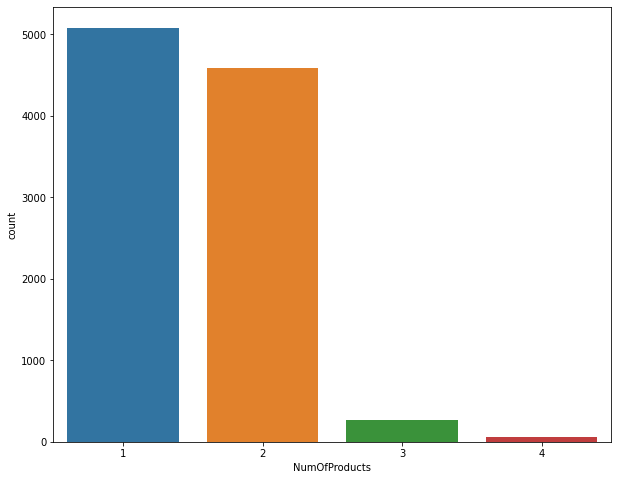

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='NumOfProducts')
plt.show()

In [ ]:
(df['NumOfProducts'].value_counts()/len(df))*100

1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64

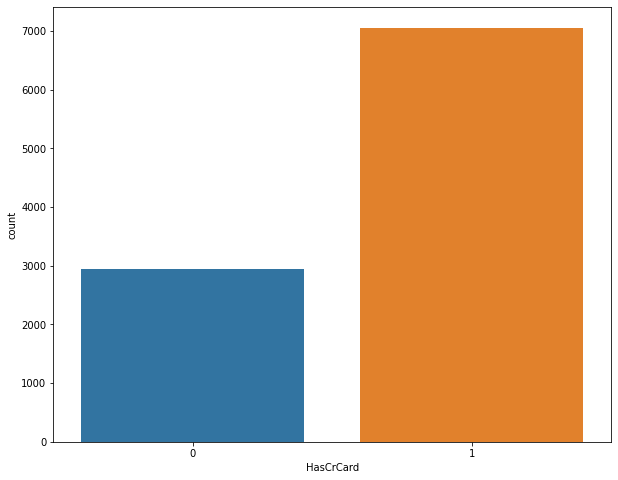

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='HasCrCard')
plt.show()

In [ ]:
(df['HasCrCard'].value_counts()/len(df))*100

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

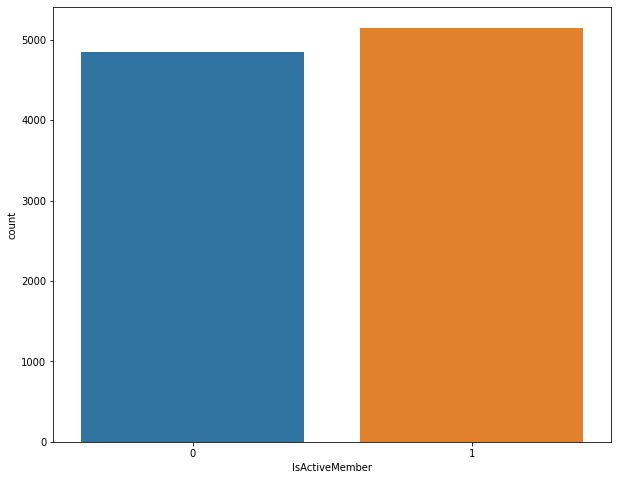

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='IsActiveMember')
plt.show()

In [ ]:
(df['IsActiveMember'].value_counts()/len(df))*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

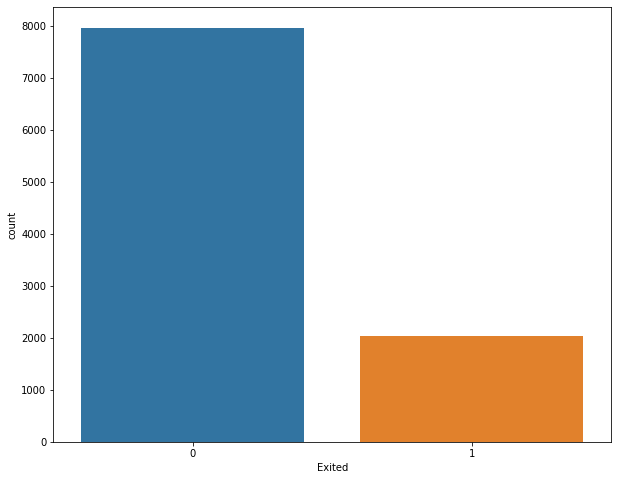

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Exited')
plt.show()

In [ ]:
(df['Exited'].value_counts()/len(df))*100

0    79.63
1    20.37
Name: Exited, dtype: float64

In [ ]:
fig = px.histogram(df, x="Age")
fig.show()

In [ ]:
fig = px.pie(df, values='IsActiveMember',names='Gender',width=800, height=500)
fig.show()

In [ ]:
fig = px.pie(df, values='Exited',names='Gender',width=800, height=500)
fig.show()

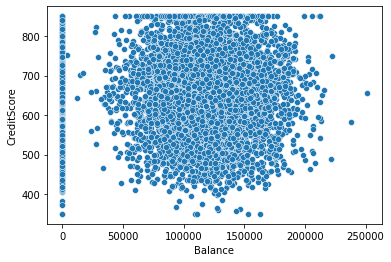

In [ ]:
sns.scatterplot(x='Balance', y='CreditScore', data=df)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



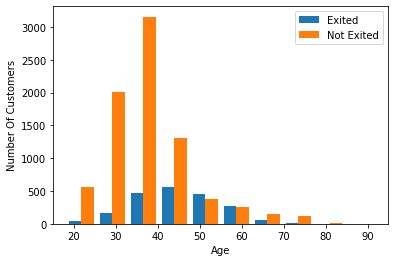

In [ ]:
Age_Exited = df[df.Exited == 1].Age
Age_NotExited = df[df.Exited == 0].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.hist([Age_Exited, Age_NotExited], label=['Exited','Not Exited'])
plt.legend()

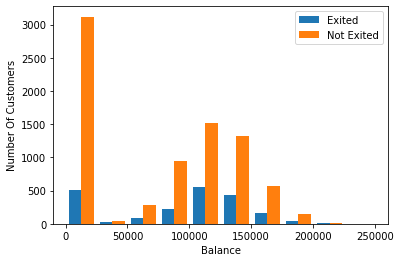

In [ ]:
Balance_Exited = df[df.Exited == 1].Balance
Balance_NotExited = df[df.Exited == 0].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.hist([Balance_Exited,Balance_NotExited],label=['Exited','Not Exited'])
plt.legend()

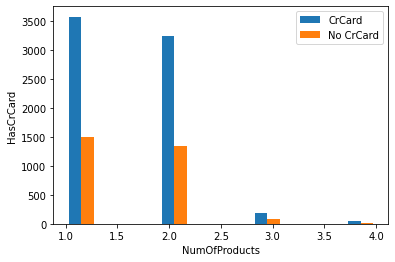

In [ ]:
Product_CrCard = df[df.HasCrCard == 1].NumOfProducts
Product_NoCrCard = df[df.HasCrCard == 0].NumOfProducts

plt.xlabel("NumOfProducts")
plt.ylabel("HasCrCard")
plt.hist([Product_CrCard,Product_NoCrCard],label=['CrCard','No CrCard'])
plt.legend()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



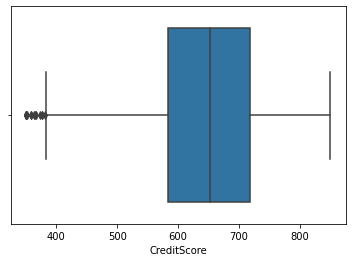

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



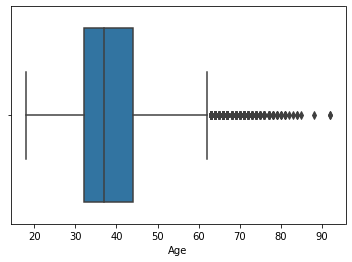

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



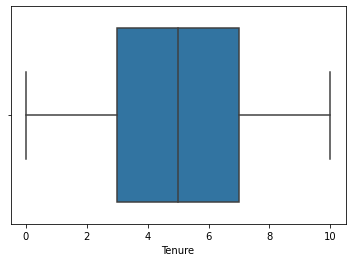

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



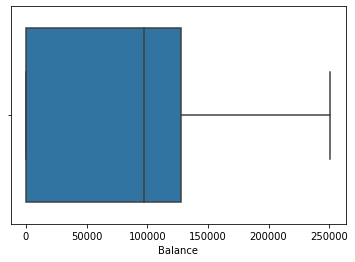

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



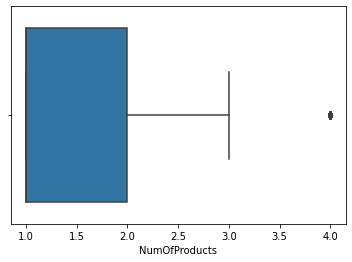

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



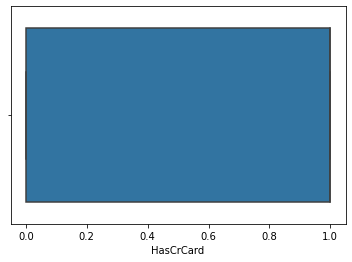

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



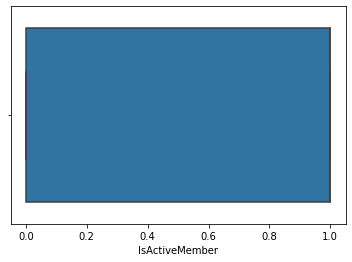

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



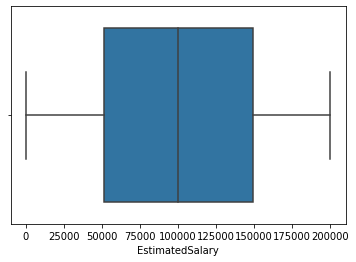

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



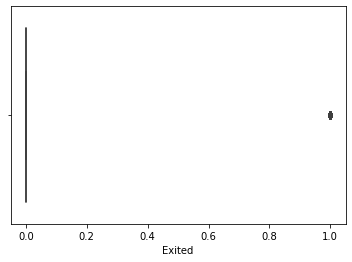

In [ ]:
colnames = df.select_dtypes(['int64', 'float64']).columns
for i in colnames:
  plt.figure()
  sns.boxplot(df[i])
  plt.show()

In [ ]:
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

up = df['Age'].quantile(0.75) + 1.5 * iqr
down = df['Age'].quantile(0.25) - 1.5 * iqr

In [ ]:
age = df['Age']
outliers = []

for i in age:
  if i>up:
    outliers.append(i)
        
for i in age:
  if i<down:
    outliers.append(i)

In [ ]:
df['Age'] = df['Age'].replace(outliers,df['Age'].mean())

In [ ]:
fig = px.histogram(df, x="Age")
fig.show()

<function matplotlib.pyplot.show(*args, **kw)>

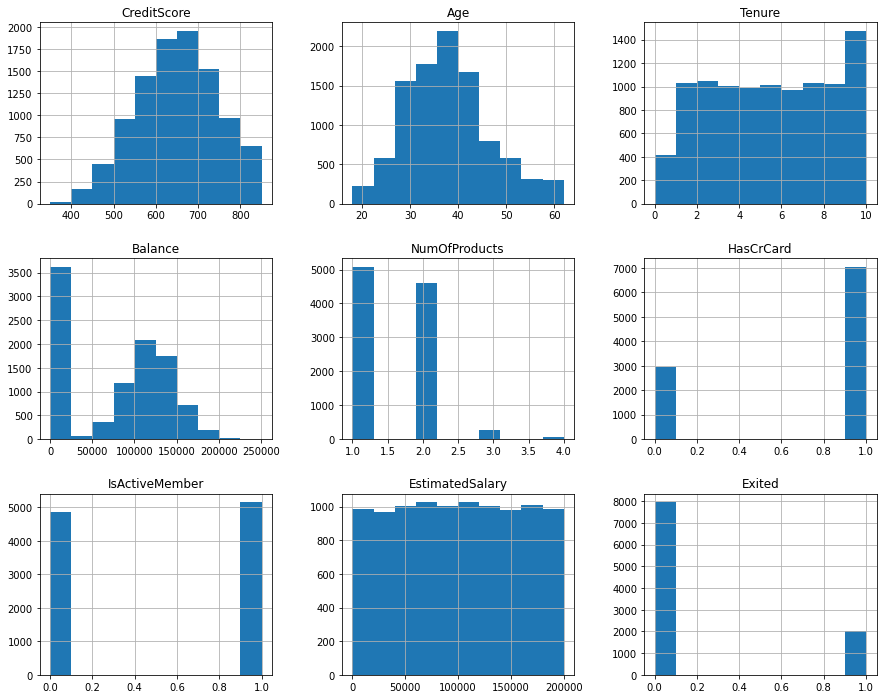

In [ ]:
df.hist(figsize=(15,12))
plt.show

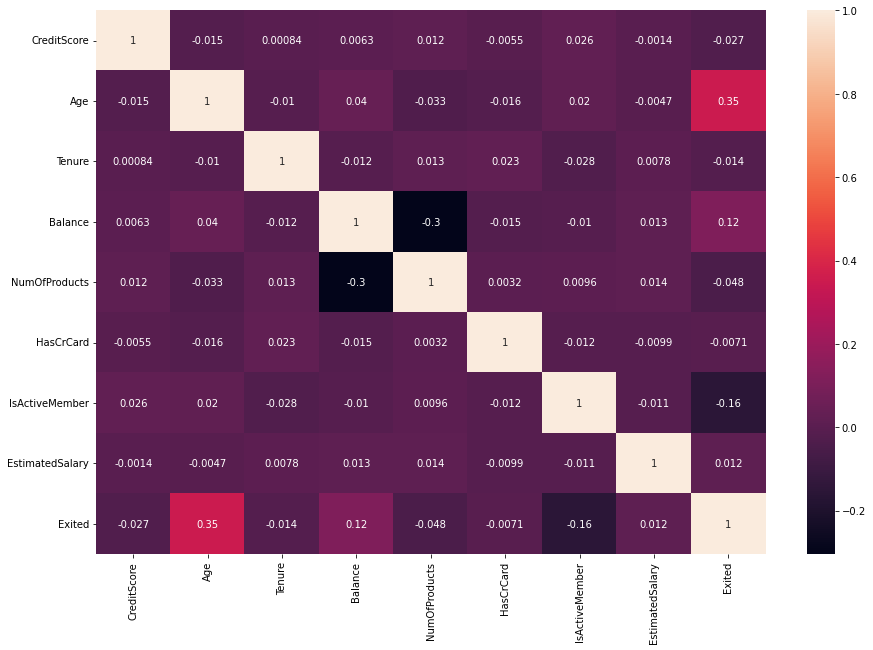

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

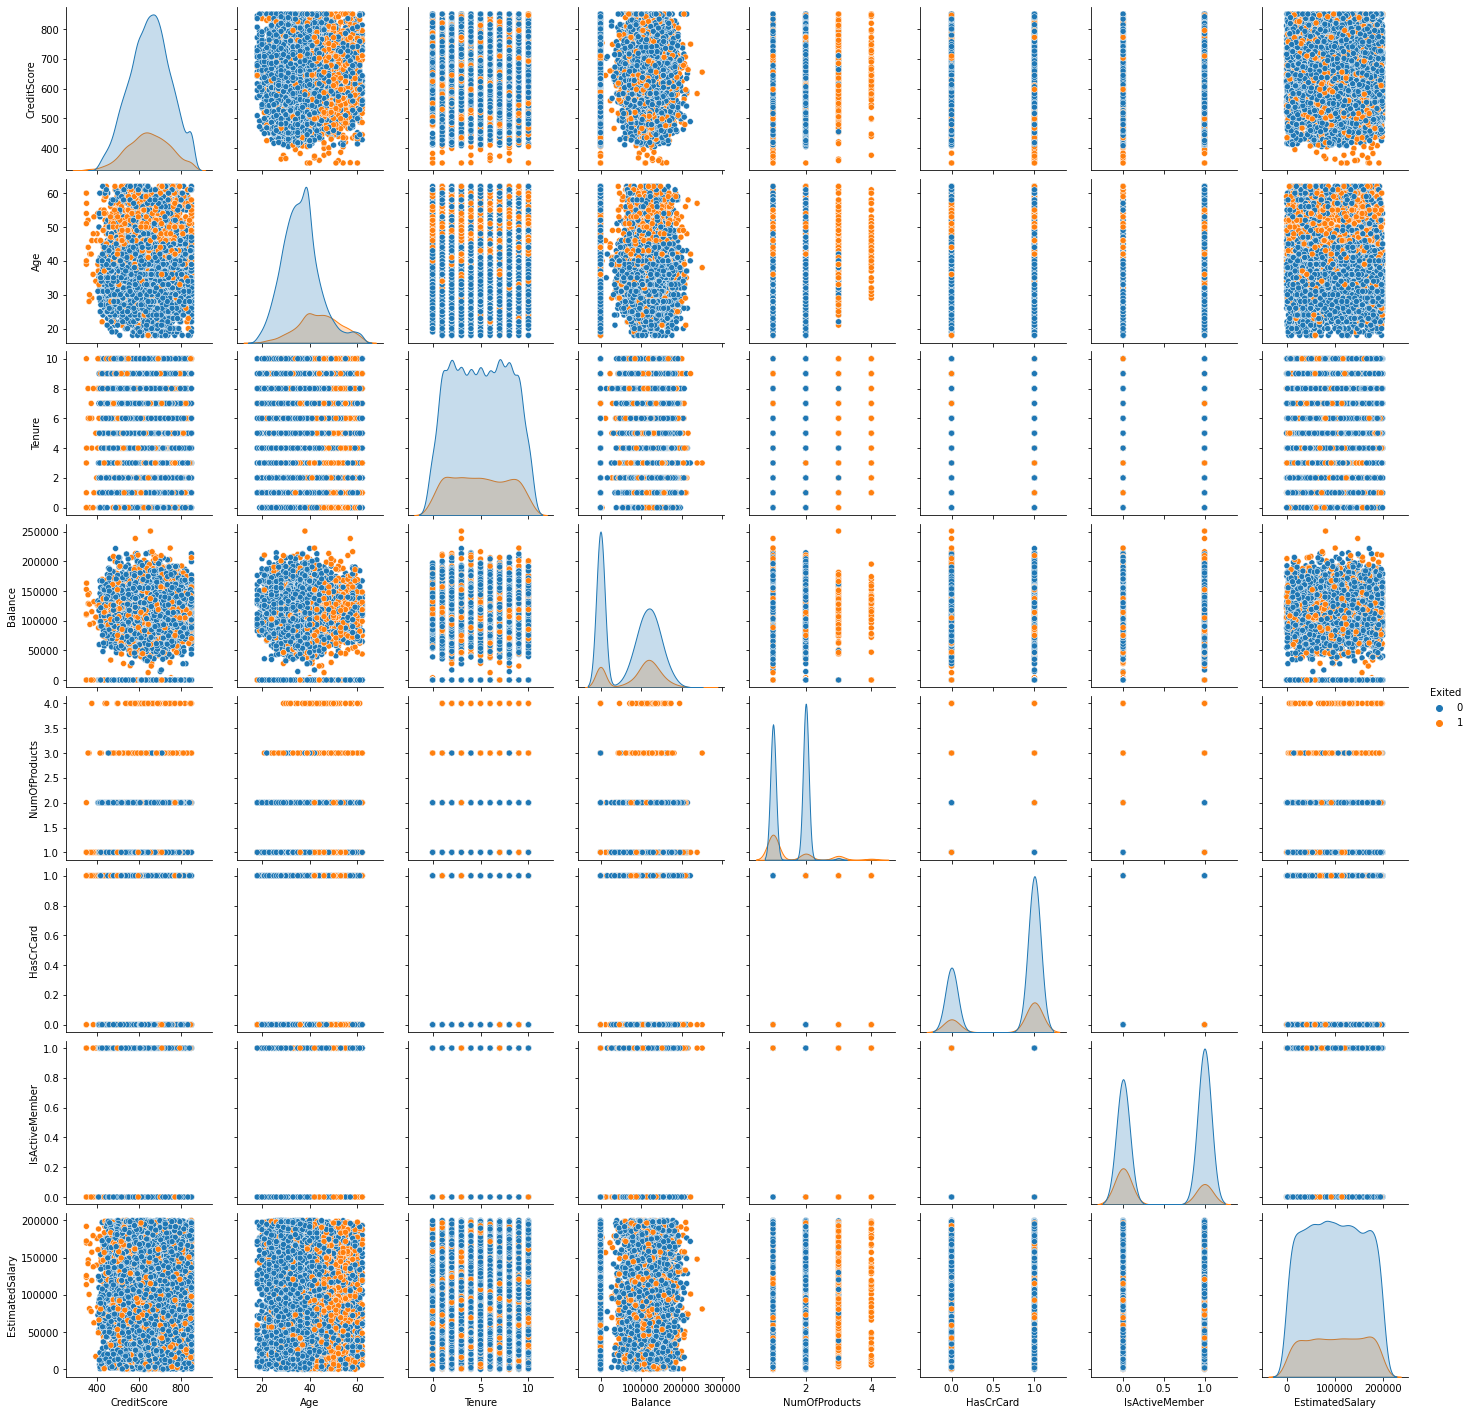

In [ ]:
sns.pairplot(df,hue='Exited')
plt.show()

In [ ]:
features = df.iloc[:,:-1]
target = df['Exited']

In [ ]:
df.select_dtypes('object').columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
le = LabelEncoder()
features['Geography'] = le.fit_transform(features['Geography'])
features['Gender'] = le.fit_transform(features['Gender'])

features.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2692,751,0,1,31.0,8,0.00,2,0,0,17550.49
9842,638,2,1,30.0,9,136808.53,2,1,1,106642.97
111,538,1,1,39.0,7,108055.10,2,1,0,27231.26
8598,678,2,0,49.0,1,0.00,2,1,1,102472.90
9532,592,0,1,29.0,7,0.00,2,1,1,91196.67


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, random_state=2, test_size=0.2, stratify=target)

# **Machine Learning Models; Evaluating and Comparing them**

In [ ]:
scores = {}
acc = []
Training_scores = []
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    Training_score = model.score(xtrain, ytrain)
    print("Training_Acc: {}".format(Training_score))
    
    Testing_score = model.score(xtest, ytest)
    print("Accuracy: {}".format(Testing_score))
    
    acc.append(Testing_score)
    Training_scores.append(Training_score)
    
    print(classification_report(ytest, ypred))

In [ ]:
lr = mymodel(LogisticRegression())

Training_Acc: 0.79625
Accuracy: 0.7965
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
knn = mymodel(KNeighborsClassifier())

Training_Acc: 0.818625
Accuracy: 0.7525
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1593
           1       0.23      0.09      0.13       407

    accuracy                           0.75      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.68      0.75      0.71      2000



In [ ]:
gnb = mymodel(GaussianNB())

Training_Acc: 0.803
Accuracy: 0.808
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1593
           1       0.58      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:
svc = mymodel(SVC())

Training_Acc: 0.79625
Accuracy: 0.7965
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
dt = mymodel(DecisionTreeClassifier())

Training_Acc: 1.0
Accuracy: 0.795
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1593
           1       0.50      0.52      0.51       407

    accuracy                           0.80      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.80      0.80      0.80      2000



In [ ]:
rf = mymodel(RandomForestClassifier())

Training_Acc: 1.0
Accuracy: 0.8585
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
abc = mymodel(AdaBoostClassifier())

Training_Acc: 0.8565
Accuracy: 0.8575
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.75      0.45      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
gbc = mymodel(GradientBoostingClassifier())

Training_Acc: 0.86775
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.42      0.55       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
xgb = mymodel(XGBClassifier())

Training_Acc: 0.866375
Accuracy: 0.8605
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.81      0.41      0.54       407

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.86      0.86      0.84      2000



In [ ]:
target.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

***Imbalanced data in target column, need to balance data***

In [ ]:
scores1 = {}
acc1 = []
Training_scores1 = []
def mymodel(model):
  model.fit(xtrain, ytrain)
  ypred = model.predict(xtest)
  
  Training_score =model.score(xtrain, ytrain)
  print("Training_Acc: {}".format(Training_score))
  
  Testing_score = model.score(xtest, ytest)
  print("Accuracy: {}".format(Testing_score))
  
  acc1.append(Testing_score)
  Training_scores1.append(Training_score)
  
  print(classification_report(ytest, ypred))

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_sample, y_sample = ros.fit_resample(features, target)

In [ ]:
y_sample.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x_sample, y_sample, random_state=2, test_size=0.2)

In [ ]:
lr = mymodel(LogisticRegression())

Training_Acc: 0.6638147566718995
Accuracy: 0.6789077212806026
              precision    recall  f1-score   support

           0       0.69      0.66      0.67      1602
           1       0.67      0.70      0.68      1584

    accuracy                           0.68      3186
   macro avg       0.68      0.68      0.68      3186
weighted avg       0.68      0.68      0.68      3186



In [ ]:
knn = mymodel(KNeighborsClassifier())

Training_Acc: 0.8044740973312402
Accuracy: 0.6867545511613308
              precision    recall  f1-score   support

           0       0.74      0.58      0.65      1602
           1       0.65      0.80      0.72      1584

    accuracy                           0.69      3186
   macro avg       0.70      0.69      0.68      3186
weighted avg       0.70      0.69      0.68      3186



In [ ]:
gnb = mymodel(GaussianNB())

Training_Acc: 0.6929356357927786
Accuracy: 0.7096672944130571
              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1602
           1       0.74      0.65      0.69      1584

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186



In [ ]:
svc = mymodel(SVC())

Training_Acc: 0.5709576138147566
Accuracy: 0.5621468926553672
              precision    recall  f1-score   support

           0       0.60      0.40      0.48      1602
           1       0.54      0.73      0.62      1584

    accuracy                           0.56      3186
   macro avg       0.57      0.56      0.55      3186
weighted avg       0.57      0.56      0.55      3186



In [ ]:
dt = mymodel(DecisionTreeClassifier())

Training_Acc: 1.0
Accuracy: 0.9155681104833647
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      1602
           1       0.86      0.99      0.92      1584

    accuracy                           0.92      3186
   macro avg       0.92      0.92      0.92      3186
weighted avg       0.92      0.92      0.92      3186



In [ ]:
rf = mymodel(RandomForestClassifier())

Training_Acc: 1.0
Accuracy: 0.9535467671060891
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1602
           1       0.93      0.98      0.95      1584

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.96      0.95      0.95      3186



In [ ]:
abc = mymodel(AdaBoostClassifier())

Training_Acc: 0.7693877551020408
Accuracy: 0.7727558066541117
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1602
           1       0.78      0.75      0.77      1584

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186



In [ ]:
gbc = mymodel(GradientBoostingClassifier())

Training_Acc: 0.7947409733124019
Accuracy: 0.7978656622724419
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1602
           1       0.81      0.78      0.79      1584

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [ ]:
xgb = mymodel(XGBClassifier())

Training_Acc: 0.7897174254317112
Accuracy: 0.7912743251726303
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1602
           1       0.80      0.77      0.78      1584

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [ ]:
models = ["LogisticRegression", "KNeighborsClassifier", "GaussianNB", "SVC", "DecisionTreeClassifier", "RandomForestClassifier", "AdaBoostClassifier", "GradientBoostingClassifier", "XGBClassifier"]

In [ ]:
scores = { "Model Name" : models, "Training_Acc before ROS" : Training_scores, "Training_Acc after ROS " :Training_scores1, "Accuracy Score before ROS" : acc, "Accuracy Score after ROS" : acc1 }

In [ ]:
df1 = pd.DataFrame(scores)
df1

,Model Name,Training_Acc before ROS,Training_Acc after ROS,Accuracy Score before ROS,Accuracy Score after ROS
0,LogisticRegression,0.796250,0.663815,0.7965,0.678908
1,KNeighborsClassifier,0.818625,0.804474,0.7525,0.686755
2,GaussianNB,0.803000,0.692936,0.8080,0.709667
3,SVC,0.796250,0.570958,0.7965,0.562147
4,DecisionTreeClassifier,1.000000,1.000000,0.7950,0.915568
5,RandomForestClassifier,1.000000,1.000000,0.8585,0.953547
6,AdaBoostClassifier,0.856500,0.769388,0.8575,0.772756
7,GradientBoostingClassifier,0.867750,0.794741,0.8600,0.797866
8,XGBClassifier,0.866375,0.789717,0.8605,0.791274


Text(0.5, 1.0, 'Model Comparision wrt Score')

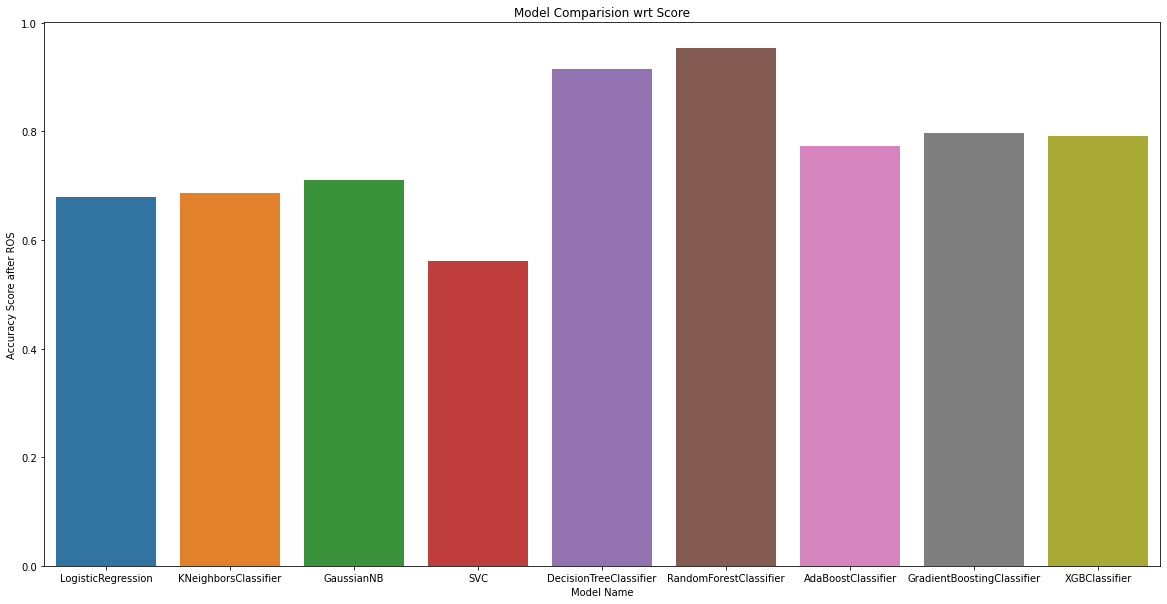

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = "Model Name", y = "Accuracy Score after ROS", data=df1)
plt.title("Model Comparision wrt Score")

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# **Deep Learning Model**

In [ ]:
classifier = Sequential()

classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(x_sample, y_sample, batch_size=10, epochs=150)

Epoch 1/150
1593/1593 [==============================] - 3s 1ms/step - loss: 0.7100 - accuracy: 0.5452
Epoch 2/150
1593/1593 [==============================] - 2s 1ms/step - loss: 0.6877 - accuracy: 0.5637
Epoch 3/150
1593/1593 [==============================] - 2s 1ms/step - loss: 0.6880 - accuracy: 0.5608
Epoch 4/150
1593/1593 [==============================] - 2s 1ms/step - loss: 0.6885 - accuracy: 0.5595
Epoch 5/150
1593/1593 [==============================] - 2s 1ms/step - loss: 0.6866 - accuracy: 0.5611
Epoch 6/150
1593/1593 [==============================] - 2s 1ms/step - loss: 0.6868 - accuracy: 0.5654
Epoch 7/150
1593/1593 [==============================] - 2s 1ms/step - loss: 0.6871 - accuracy: 0.5559
Epoch 8/150
1593/1593 [==============================] - 2s 1ms/step - loss: 0.6853 - accuracy: 0.5668
Epoch 9/150
1593/1593 [==============================] - 2s 1ms/step - loss: 0.6836 - accuracy: 0.5704
Epoch 10/150
1593/1593 [==============================] - 2s 1ms/step - l

In [ ]:
ypred = classifier.predict(xtest)
ypred

100/100 [==============================] - 0s 1ms/step


array([[0.55307525],
       [0.55307525],
       [0.55307525],
       ...,
       [0.3914484 ],
       [0.5530752 ],
       [0.5530752 ]], dtype=float32)

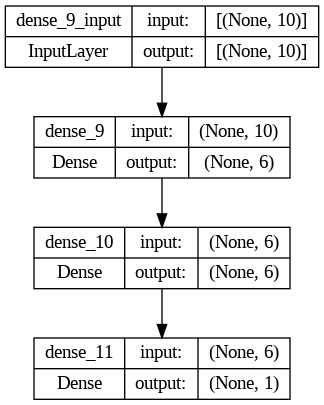

In [ ]:
from keras.utils import plot_model
plot_model(classifier, show_shapes = True)

In [ ]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 66        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print("Mean Squared Error:",mean_squared_error(ytest, ypred))
print("Mean Absolute Error:",mean_absolute_error(ytest, ypred))

Mean Squared Error: 0.24552835365060807
Mean Absolute Error: 0.48969722025175927


In [ ]:
classifier.evaluate(xtest, ytest)

100/100 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5628


[0.684163510799408, 0.562774658203125]